In [289]:
import os, shutil


In [290]:
# !pip install opendatasets

In [291]:
import opendatasets as od

In [292]:
od.download("https://www.kaggle.com/c/dogs-vs-cats/data")

Skipping, found downloaded files in ".\dogs-vs-cats" (use force=True to force download)


In [293]:
original_dataset_dir = 'C:/Users/rakes/Dropbox/My PC (LAPTOP-19A7BL73)/Desktop/AAI Assignment/AAIassignment6/dogs-vs-cats'  

In [295]:

base_dir = 'C:/Users/rakes/Dropbox/My PC (LAPTOP-19A7BL73)/Desktop/AAI Assignment/AAIassignment6/dogs-vs-cats_small'

In [296]:
# os.mkdir(base_dir)

In [297]:
train_dir = os.path.join(base_dir, 'train')

In [298]:
# os.mkdir(train_dir)

In [299]:
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)


In [300]:
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [301]:
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

In [302]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

In [303]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)


In [304]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

In [305]:
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)


In [306]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [307]:
# original_dataset_dir=original_dataset_dir+'/train/train'

In [308]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]


In [310]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [311]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]


In [313]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)



In [314]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]


In [316]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [317]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]


In [319]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [320]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]


In [322]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [323]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]


In [325]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [326]:
print('total training cat images:', len(os.listdir(train_cats_dir)))


total training cat images: 1500


In [327]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))


total training dog images: 1000


In [328]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))


total validation cat images: 500


In [329]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))


total validation dog images: 500


In [330]:
print('total test cat images:', len(os.listdir(test_cats_dir)))


total test cat images: 500


In [331]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total test dog images: 500


In [332]:
from keras import layers
from keras import models


In [333]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [334]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [335]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

c:\Users\030740227\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [336]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory( train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2500 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [337]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [338]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\030740227\AppData\Local\Temp\ipykernel_8256\775559235.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 116s 1s/step - loss: 0.6788 - acc: 0.6055 - val_loss: 0.7026 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 96s 966ms/step - loss: 0.6689 - acc: 0.5990 - val_loss: 0.7072 - val_acc: 0.5110
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.6572 - acc: 0.6175 - val_loss: 0.6888 - val_acc: 0.5400
Epoch 4/30
100/100 [==============================] - 97s 975ms/step - loss: 0.6432 - acc: 0.6350 - val_loss: 0.6435 - val_acc: 0.6280
Epoch 5/30
100/100 [==============================] - 101s 1s/step - loss: 0.6296 - acc: 0.6550 - val_loss: 0.7140 - val_acc: 0.5400
Epoch 6/30
100/100 [==============================] - 90s 898ms/step - loss: 0.6014 - acc: 0.6730 - val_loss: 0.7425 - val_acc: 0.5450
Epoch 7/30
100/100 [==============================] - 90s 895ms/step - loss: 0.5947 - acc: 0.6870 - val_loss: 0.6747 - val_acc: 0.6010
Epoch 8/30
100/100 [==============================] - 87s 875

In [339]:
model.save('cats_and_dogs_small_1.h5')


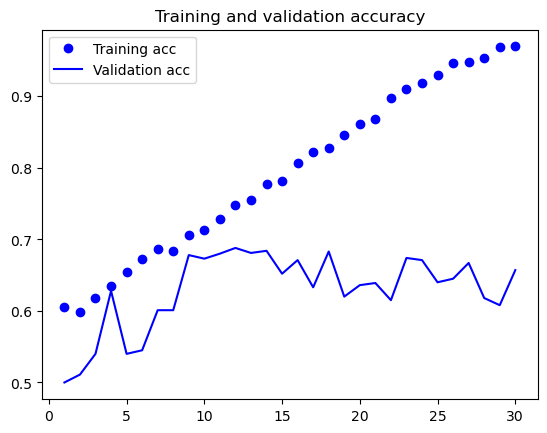

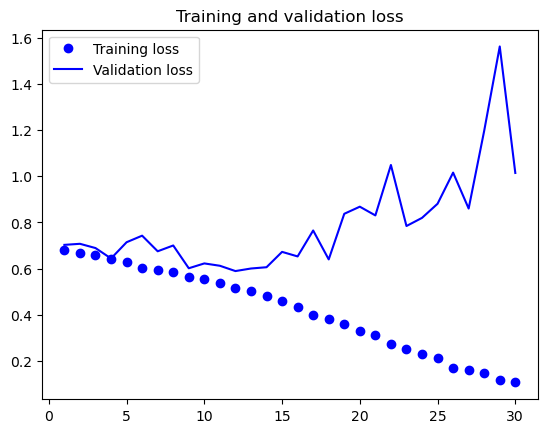

In [340]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [341]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

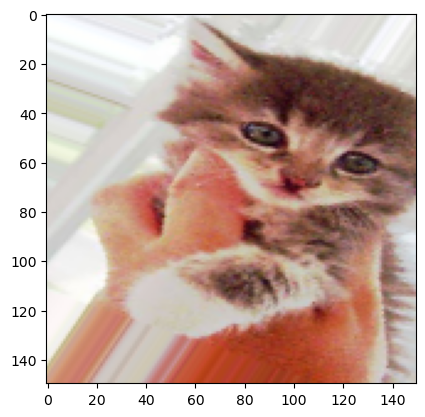

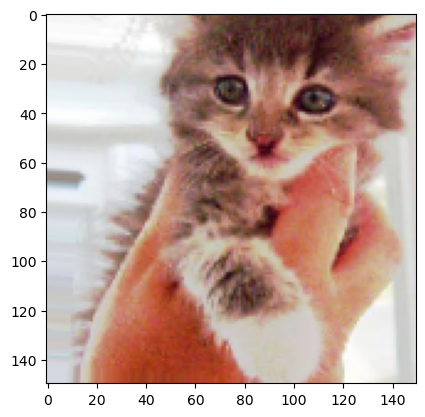

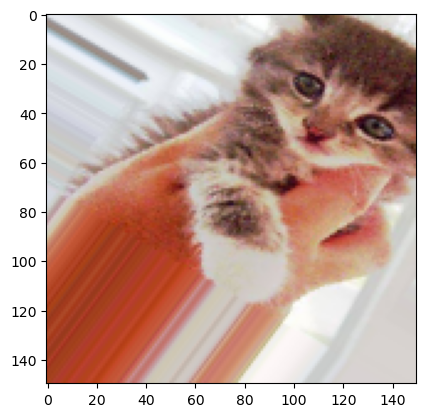

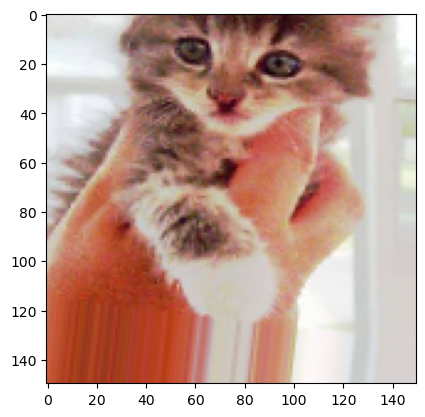

In [351]:
from keras.utils import load_img, img_to_array, array_to_img
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img =load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [385]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

In [386]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [387]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [388]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2500 images belonging to 2 classes.


In [389]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [391]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    )

Epoch 1/100
79/79 [==============================] - 103s 1s/step - loss: 0.6510 - acc: 0.6156 - val_loss: 0.6549 - val_acc: 0.5990
Epoch 2/100
79/79 [==============================] - 112s 1s/step - loss: 0.6486 - acc: 0.6232 - val_loss: 0.6434 - val_acc: 0.6250
Epoch 3/100
79/79 [==============================] - 123s 2s/step - loss: 0.6449 - acc: 0.6292 - val_loss: 0.6279 - val_acc: 0.6450
Epoch 4/100
79/79 [==============================] - 128s 2s/step - loss: 0.6379 - acc: 0.6416 - val_loss: 0.6146 - val_acc: 0.6660
Epoch 5/100
79/79 [==============================] - 108s 1s/step - loss: 0.6412 - acc: 0.6412 - val_loss: 0.6213 - val_acc: 0.6520
Epoch 6/100
79/79 [==============================] - 127s 2s/step - loss: 0.6300 - acc: 0.6540 - val_loss: 0.6229 - val_acc: 0.6490
Epoch 7/100
79/79 [==============================] - 112s 1s/step - loss: 0.6285 - acc: 0.6392 - val_loss: 0.5976 - val_acc: 0.6740
Epoch 8/100
79/79 [==============================] - 131s 2s/step - loss: 0.

In [363]:
model.save('cats_and_dogs_small_2.h5')

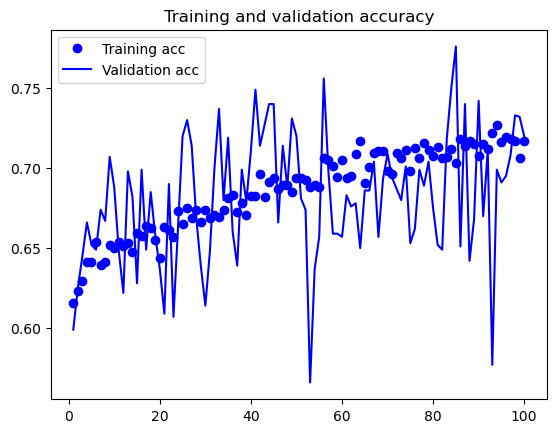

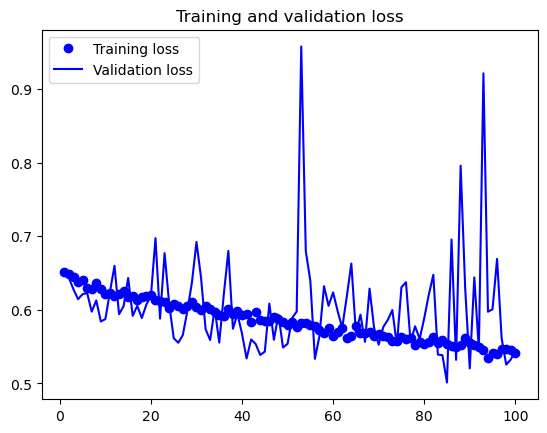

In [392]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()